## Springboard Capstone 03 - Food Allergens

### 03 Data prep and EDA

# Table of Contents<a id='Table_of_Contents'></a>
* [1.0 Set up and import statements](#1.0_setup)
* [2.0 EDA](#2.0_EDA)
* [3.0 Import images, format and normalize](#3.0_import_img)
* [4.0 Shuffle and split data](#4.0_shuffle_split)

###  1.0 Set up and import statements<a id='1.0_setup'></a>

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#verify directories
!ls '/content/gdrive/My Drive/Springboard/Capstone_Three/data/foodallergens'

 00105.jpg		  images		 start_end_img_check.gsheet
 foodallergenlabels.csv   startendimageids.csv	'Untitled document.gdoc'


In [ ]:
#provide data directory
DATA_DIR = "/content/gdrive/My Drive/Springboard/Capstone_Three/data/foodallergens/"

In [ ]:
#Import statements
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import load_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping, ModelCheckpoint


Import label data

In [ ]:
#Import label data
df = pd.read_csv(DATA_DIR + 'foodallergenlabels.csv')

In [ ]:
df.rename(columns={'Unnamed: 0': 'food'}, inplace=True)
df.head()

,food,labels,milk,eggs,fish,shellfish,tree nuts,peanuts,wheat,soybeans,sesame,id
0,adobo,"wheat, soybeans",0,0,0,0,0,0,1,1,0,00001.jpg
1,adobo,"wheat, soybeans",0,0,0,0,0,0,1,1,0,00041.jpg
2,adobo,"wheat, soybeans",0,0,0,0,0,0,1,1,0,00042.jpg
3,adobo,"wheat, soybeans",0,0,0,0,0,0,1,1,0,00043.jpg
4,adobo,"wheat, soybeans",0,0,0,0,0,0,1,1,0,00044.jpg


### 2.0 EDA<a id='EDA'></a>

In [ ]:
IMG_DIR = DATA_DIR + 'images/'

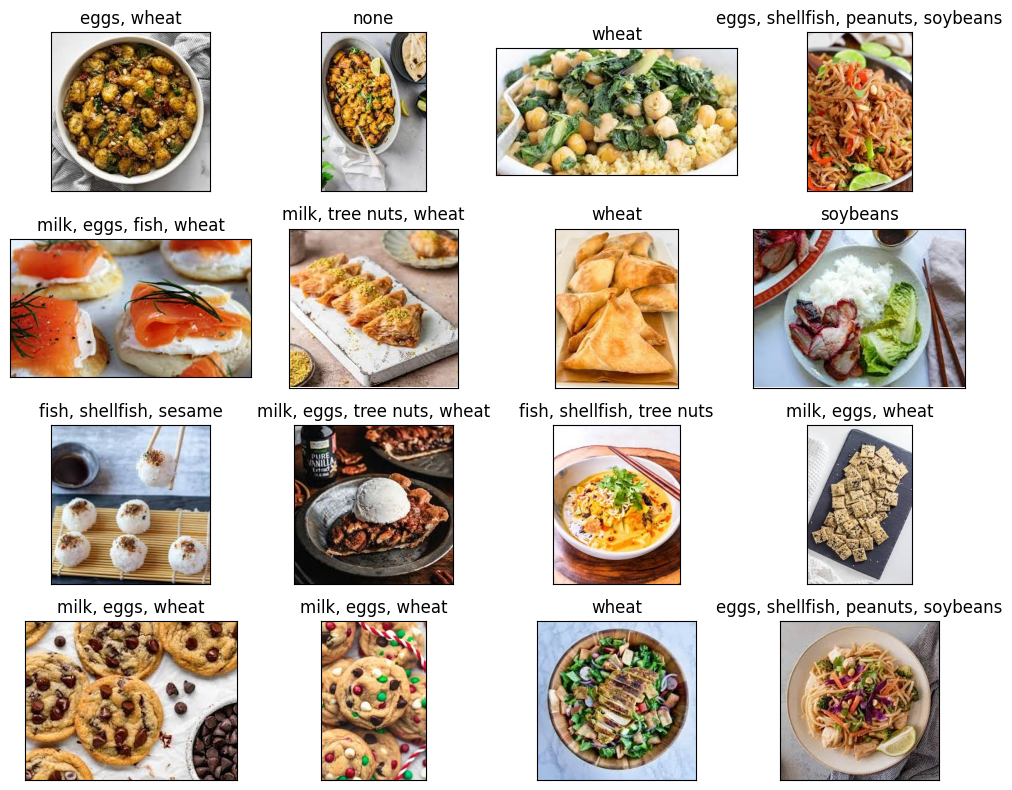

In [ ]:
#Plot a sample of images w/ labels

num_images = 16

#get a sample of images from labels file (which contains the image file name under 'id')
df_sampled = df.sample(n=num_images)

#get labels for samples
labels = df_sampled['labels'].values

#get image info for samples
ids = df_sampled['id'].values

#retrieve those ids from the images folder
image_data = []
for j in range(len(ids)):
  path = IMG_DIR + ids[j]
  img = plt.imread(path)
  image_data.append(img)

fig, axes = plt.subplots(4, 4, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(image_data[i])  # Display the image
            ax.set_title(labels[i])  # Set the label as title
            ax.set_xticks([])  # Remove x-axis ticks
            ax.set_yticks([])  # Remove y-axis ticks
        else:
            ax.axis('off') # Turn off empty subplots
plt.tight_layout()
plt.show()

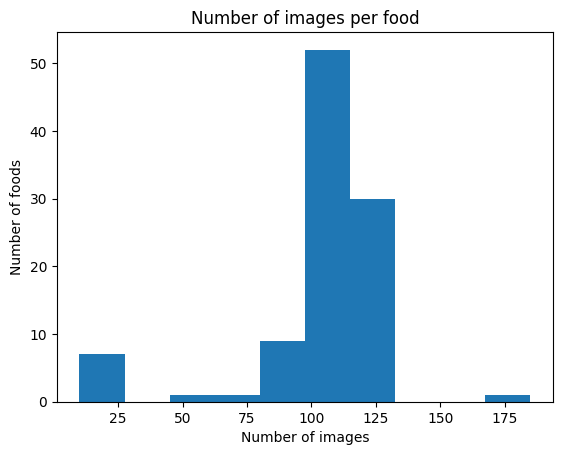

In [ ]:
#Can you create a histogram that shows the distribution of each allergy in the dataset?
df_temp = df.groupby('food').size().sort_values(ascending=False).head(20)

plt.hist(df.groupby('food').size())
plt.title('Number of images per food')
plt.xlabel('Number of images')
plt.ylabel('Number of foods')
plt.savefig("number_images_per_food.png")
plt.show()

Text(0.5, 0, 'Pixel value')

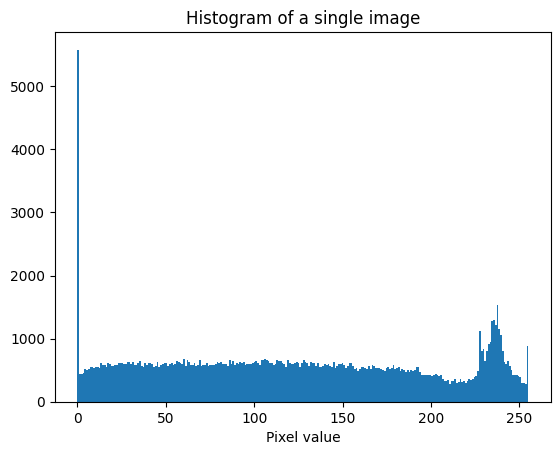

In [ ]:
#Histogram of a single image
plt.hist(image_data[0].flatten(), bins=256)
plt.title('Histogram of a single image')
plt.xlabel('Pixel value')
p.ylabel('Number of pixels')
plt.savefig("histogram_single_image.png")
plt.show()

### 3.0 Import images, format and normalize<a id='3.0_import_img'></a>

In [ ]:
#Import images, format as array and normalize

!pip install pillow
from PIL import UnidentifiedImageError # import the error explicitly

size = 200
X_data = []
for i in tqdm(range(df.shape[0])):
  try:
    img = image.load_img(IMG_DIR + df['id'][i], target_size=(size, size, 3))
    img = image.img_to_array(img)
    img = img/255
    X_data.append(img)
  except UnidentifiedImageError:
    print(f"Could not open image: {IMG_DIR + df['id'][i]}")
    continue
X_arr = np.array(X_data)


 10%|▉         | 998/10484 [13:14<2:12:09,  1.20it/s]

Could not open image: /content/gdrive/My Drive/Springboard/Capstone_Three/data/foodallergens/images/00984.jpg


 34%|███▎      | 3529/10484 [47:15<1:50:05,  1.05it/s]

In [ ]:
df.shape

(10484, 12)

In [ ]:
X_arr.shape

(10483, 200, 200, 3)

In [ ]:
df.head()

,food,labels,milk,eggs,fish,shellfish,tree nuts,peanuts,wheat,soybeans,sesame,id
0,adobo,"wheat, soybeans",0,0,0,0,0,0,1,1,0,00001.jpg
1,adobo,"wheat, soybeans",0,0,0,0,0,0,1,1,0,00041.jpg
2,adobo,"wheat, soybeans",0,0,0,0,0,0,1,1,0,00042.jpg
3,adobo,"wheat, soybeans",0,0,0,0,0,0,1,1,0,00043.jpg
4,adobo,"wheat, soybeans",0,0,0,0,0,0,1,1,0,00044.jpg


In [ ]:
#Format y data
#Remove corrupted image
df_temp = df[df['id'] != '00984.jpg']
y_arr = np.array(df_temp.drop(['food', 'labels', 'id'], axis=1))
y_arr.shape

(10483, 9)

### 4.0 Shuffle and split data<a id='4.0_shuffle_split'></a>

In [ ]:
#Shuffle the data
X, y = shuffle(X_arr, y_arr)


[0 0 1 1 1 0 0 0 1]


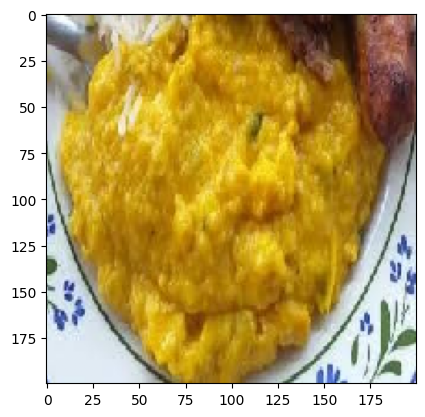

In [ ]:
#Check that images and labels match

imno = 495
print(y[imno])
plt.imshow(X[imno])
plt.show()

In [ ]:
#Split the data into train, validate, test
#Manually separate out a certain amount for the test data: X_test and y_test
#Use train_test_split to create train and validate sets: X_train, X_val, y_train, y_val
# X = X[:9435]
# test_X = X[9435:]
# y = y[:9435]
# test_y = X[9435:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2)